## SOCP Lifts of Regular 4gon

In [2]:
import numpy as np
from scipy.linalg import circulant
import conicmu

In [3]:
# Generate regular n-gon Slack Matrix
def GenerateSCngon(n):
    
    v = np.zeros((n,))
    for i in range(n):
        v[i,] = np.cos(np.pi/n) - np.cos((2*i-1)*np.pi/n)
    SC = circulant(v)

    return SC

In [4]:
# Construct the Slack Matrix
SC = GenerateSCngon(4)

In [5]:
SC

array([[0.        , 1.41421356, 1.41421356, 0.        ],
       [0.        , 0.        , 1.41421356, 1.41421356],
       [1.41421356, 0.        , 0.        , 1.41421356],
       [1.41421356, 1.41421356, 0.        , 0.        ]])

### SOCP(1)

In [6]:
Profile = [(1,'socp')]
Output_1 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_1")

Perform Initial Sweep
Final Error: 0.5000414985396376
Final Error: 0.5000203740082598
Final Error: 0.5000192311706034
Final Error: 0.5000141979840697
Final Error: 0.5000169779355186
Final Error: 0.5000142899750037
Final Error: 0.5000079027796491
Final Error: 0.5000168666253019
Final Error: 0.5000122998085793
Final Error: 0.5000120879374357
Final Error: 0.5000166876556574
Final Error: 0.5000121851858365
Final Error: 0.5000223625958929
Final Error: 0.5000165177651666
Final Error: 0.5000277878304086
Final Error: 0.500029937391492
Final Error: 0.5000218949576483
Final Error: 0.5000432548137781
Final Error: 0.5000179394810185
Final Error: 0.5000163005134223
Final Error: 0.5000120764379377
Final Error: 0.5000165456396862
Final Error: 0.5000193898107151
Final Error: 0.5000145258864618
Final Error: 0.5000152736253428
Final Error: 0.5000142144190222
Final Error: 0.500012450217673
Final Error: 0.500008083713184
Final Error: 0.5000219494318264
Final Error: 0.5000158382101108
Final Error: 0.500013

### SOCP(1) x SOCP(1)

In [7]:
Profile = [(1,'socp'),(1,'socp')]
Output_11 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_11")

Perform Initial Sweep
Final Error: 0.009011950226902975
Final Error: 0.009779359510865188
Final Error: 0.010393766992458578
Final Error: 0.010029488218690836
Final Error: 0.012356199865808066
Final Error: 0.00986954127361189
Final Error: 0.009807998501632508
Final Error: 0.009222079414472494
Final Error: 0.01379323062024076
Final Error: 0.009412566770080667
Final Error: 0.008871049533635416
Final Error: 0.007918139211725107
Final Error: 0.010238435098265043
Final Error: 0.00965208843993611
Final Error: 0.009998723924971552
Final Error: 0.01056667824618539
Final Error: 0.009348491825380095
Final Error: 0.008577625609245536
Final Error: 0.010049251792846077
Final Error: 0.008839919053824027
Final Error: 0.011336782163325072
Final Error: 0.00985665857252009
Final Error: 0.008818484101172197
Final Error: 0.010208244226378792
Final Error: 0.012286782767072228
Final Error: 0.009193037106998052
Final Error: 0.009187278758829647
Final Error: 0.015735359035387097
Final Error: 0.0098902850766228

In [8]:
from matplotlib import pyplot as plt


Text(0, 0.5, 'Squared Error Loss')

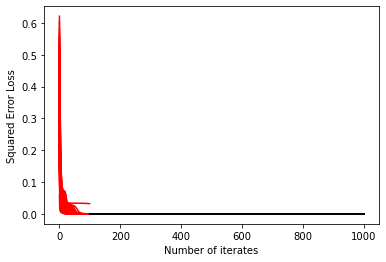

In [9]:
for arr in Output_11['FirstRoundErrors']:
    arr = np.multiply(arr,arr)
    
    plt.plot(arr,'r')
for arr in Output_11['SecondRoundErrors']:
    brr = np.zeros((1000,))
    for jj in range(100):
        brr[jj,] = np.NaN
    brr[100:,] = arr
    brr = np.multiply(brr,brr)
    plt.plot(brr,'k')
    
plt.xlabel("Number of iterates")
plt.ylabel("Squared Error Loss")

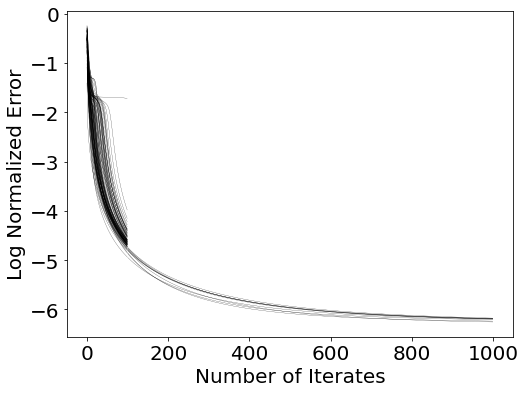

In [13]:
plt.figure(figsize=(8, 6))

for arr in Output_11['FirstRoundErrors']:
    #arr = np.multiply(arr,arr)
    arr = np.log(arr)
    plt.plot(arr,'k',linewidth=0.2)
for arr in Output_11['SecondRoundErrors']:
    brr = np.zeros((1000,))
    for jj in range(100):
        brr[jj,] = np.NaN
    brr[100:,] = arr
    #brr = np.multiply(brr,brr)
    brr = np.log(brr)
    plt.plot(brr,'k',linewidth=0.2)
    
plt.xlabel("Number of Iterates",fontsize=20)
plt.xticks(fontsize=20)
plt.ylabel("Log Normalized Error",fontsize=20)
plt.yticks(fontsize=20)

plt.savefig('logerror.png')

### SOCP(1) x SOCP(1) x SOCP(1)

In [11]:
Profile = [(1,'socp'),(1,'socp'),(1,'socp')]
Output_111 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_111")

Perform Initial Sweep
Final Error: 0.009285670506082078
Final Error: 0.009403347381569659
Final Error: 0.010798339429452252
Final Error: 0.011117205089721
Final Error: 0.010116744266391255
Final Error: 0.00921156330172239
Final Error: 0.012053306303203705
Final Error: 0.012386707186984373
Final Error: 0.012221401084651461
Final Error: 0.012699487593316164
Final Error: 0.00732675990641873
Final Error: 0.009283865023411242
Final Error: 0.009556971007232238
Final Error: 0.009989887037263945
Final Error: 0.008045958809273205
Final Error: 0.011372778509604838
Final Error: 0.010724528968509353
Final Error: 0.012254542529871097
Final Error: 0.011642498471971038
Final Error: 0.011101092486240907
Final Error: 0.01199276824080954
Final Error: 0.013837039640467362
Final Error: 0.008618903303575653
Final Error: 0.009426871541634997
Final Error: 0.011673498616560257
Final Error: 0.012368091699248678
Final Error: 0.01325522769447167
Final Error: 0.013878660155330083
Final Error: 0.01375949365418252


### SOCP(2)

In [12]:
Profile = [(2,'socp')]
Output_2 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_2")

Perform Initial Sweep
Final Error: 0.22029923159249942
Final Error: 0.18497376446325461
Final Error: 0.18570118228222965
Final Error: 0.19165376664187342
Final Error: 0.18826345822536716
Final Error: 0.24805143950823522
Final Error: 0.17735363981581379
Final Error: 0.18196739438587564
Final Error: 0.18645713133019434
Final Error: 0.17029589093740033
Final Error: 0.266789193971804
Final Error: 0.24695535000858346
Final Error: 0.18743265843611012
Final Error: 0.20932291051316856
Final Error: 0.18567128847084954
Final Error: 0.17538217974803666
Final Error: 0.22089182342009944
Final Error: 0.17778727367440209
Final Error: 0.17327734751791127
Final Error: 0.2847546444172107
Final Error: 0.18290144025281657
Final Error: 0.1978327337235138
Final Error: 0.17685736038482638
Final Error: 0.1830697692580894
Final Error: 0.17399883232335528
Final Error: 0.19600220571722132
Final Error: 0.17743994332197177
Final Error: 0.1694385766552893
Final Error: 0.19171546148576377
Final Error: 0.181379501831

### SOCP(2) x SOCP(2)

In [13]:
Profile = [(2,'socp'),(2,'socp')]
Output_22 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_22")

Perform Initial Sweep
Final Error: 0.017182476472836647
Final Error: 0.11239884806362309
Final Error: 0.009723848192249291
Final Error: 0.07147551915260521
Final Error: 0.01892395337177877
Final Error: 0.09164228524089534
Final Error: 0.07320026797505073
Final Error: 0.04079612686067057
Final Error: 0.06675475872076483
Final Error: 0.01036824850449709
Final Error: 0.015007594404754129
Final Error: 0.13439737651598954
Final Error: 0.011453554047111056
Final Error: 0.021283187058447256
Final Error: 0.06824898221283808
Final Error: 0.01732644193305883
Final Error: 0.05462922850712561
Final Error: 0.020188503150630772
Final Error: 0.05981816705393518
Final Error: 0.05017286368112278
Final Error: 0.04489021824198651
Final Error: 0.016486144116240227
Final Error: 0.08733346675567596
Final Error: 0.04614595898896573
Final Error: 0.037935773598266775
Final Error: 0.012799409565742034
Final Error: 0.013498030138830646
Final Error: 0.04183846192973398
Final Error: 0.10285724552548553
Final Error

In [14]:
Profile = [(2,'socp'),(2,'socp'),(2,'socp')]
Output_222 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_222")

Perform Initial Sweep
Final Error: 0.014554328826378032
Final Error: 0.03207810228312871
Final Error: 0.019498598672655364
Final Error: 0.01949721890096628
Final Error: 0.009661788486191219
Final Error: 0.02990399960536968
Final Error: 0.017579533587039734
Final Error: 0.03397578156587972
Final Error: 0.010551294741056776
Final Error: 0.015893894495538574
Final Error: 0.012064432619373702
Final Error: 0.0148429539816955
Final Error: 0.011782351927274386
Final Error: 0.025734545367745578
Final Error: 0.015144722422939686
Final Error: 0.01380554404405257
Final Error: 0.014842072404628065
Final Error: 0.01916369514709637
Final Error: 0.02508019162029428
Final Error: 0.01835249627940344
Final Error: 0.010114401147071858
Final Error: 0.017475578082152613
Final Error: 0.018260747551270086
Final Error: 0.02938627434549932
Final Error: 0.012529760726693297
Final Error: 0.01128591666316066
Final Error: 0.027380535793189355
Final Error: 0.024892670792655412
Final Error: 0.010795479203169643
Fina

### SOCP(3)

In [15]:
Profile = [(3,'socp')]
Output_3 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_3")

Perform Initial Sweep
Final Error: 0.1948722107401218
Final Error: 0.18824009340985212
Final Error: 0.1810362874894043
Final Error: 0.17671587142876186
Final Error: 0.21671122025780507
Final Error: 0.1868642500954194
Final Error: 0.18974626463734842
Final Error: 0.18077320510650385
Final Error: 0.17809708160531013
Final Error: 0.21342494177467983
Final Error: 0.2121091191680302
Final Error: 0.18193893500821962
Final Error: 0.1803603504462137
Final Error: 0.19893394872159678
Final Error: 0.18073144359297172
Final Error: 0.18717381233248262
Final Error: 0.18894459843149236
Final Error: 0.20280512587053487
Final Error: 0.19071024391154326
Final Error: 0.2085336963043507
Final Error: 0.1732202514546385
Final Error: 0.21145157254886796
Final Error: 0.1959764683600706
Final Error: 0.2311688172493183
Final Error: 0.2091180154171516
Final Error: 0.23828405127451313
Final Error: 0.18398490587879957
Final Error: 0.20854410789311673
Final Error: 0.19666067094476122
Final Error: 0.2056745717205538

In [16]:
Profile = [(3,'socp'),(3,'socp')]
Output_33 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_33")

Perform Initial Sweep
Final Error: 0.09207435938382914
Final Error: 0.05009836298690985
Final Error: 0.04003391766882231
Final Error: 0.06759647384165787
Final Error: 0.031025553826811138
Final Error: 0.052969889912978525
Final Error: 0.029018838087855738
Final Error: 0.024286437587209306
Final Error: 0.03802155777664552
Final Error: 0.02669635170291664
Final Error: 0.06366402693320906
Final Error: 0.027523314197800214
Final Error: 0.022887918584013744
Final Error: 0.043868317927935586
Final Error: 0.03972697680881057
Final Error: 0.050761579008083806
Final Error: 0.01934654609036477
Final Error: 0.04886639224284798
Final Error: 0.02005339085398686
Final Error: 0.061119424800713806
Final Error: 0.0674825068527705
Final Error: 0.05962979857543341
Final Error: 0.10436740073515322
Final Error: 0.021607172858268284
Final Error: 0.05544002272303317
Final Error: 0.035367758311980586
Final Error: 0.02287151196130077
Final Error: 0.08565121122587575
Final Error: 0.01954823900516597
Final Error

In [17]:
Profile = [(3,'socp'),(3,'socp'),(3,'socp')]
Output_333 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_333")

Perform Initial Sweep
Final Error: 0.021668593433822714
Final Error: 0.011652986582756764
Final Error: 0.021540133676458285
Final Error: 0.01487830934285379
Final Error: 0.014602191465400541
Final Error: 0.01606475850699336
Final Error: 0.020384045776661832
Final Error: 0.021565931777353206
Final Error: 0.03147670740774104
Final Error: 0.013407150791196379
Final Error: 0.018660501205755846
Final Error: 0.021646195656096563
Final Error: 0.019489724739179044
Final Error: 0.015006719417348132
Final Error: 0.02105784340732795
Final Error: 0.01817249187222577
Final Error: 0.012122030290258216
Final Error: 0.028587118936324648
Final Error: 0.014406752681264382
Final Error: 0.04346921558588365
Final Error: 0.011842333155329884
Final Error: 0.016756162185367785
Final Error: 0.02171582396652972
Final Error: 0.024163020556923185
Final Error: 0.012152142257916542
Final Error: 0.02094925905504963
Final Error: 0.018270105379626377
Final Error: 0.017228636001815942
Final Error: 0.027834460098651086


In [18]:
Profile = [(4,'socp')]
Output_4 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_4")

Perform Initial Sweep
Final Error: 0.18425095754423132
Final Error: 0.2517002525908878
Final Error: 0.20904813765639538
Final Error: 0.22632344364801343
Final Error: 0.24134727458887106
Final Error: 0.2283655375801088
Final Error: 0.2543021191052154
Final Error: 0.21498619595733093
Final Error: 0.21503332641744316
Final Error: 0.21394447456961552
Final Error: 0.18433513324960074
Final Error: 0.18988041271483366
Final Error: 0.19134921278412864
Final Error: 0.22133878223031392
Final Error: 0.18677023019483752
Final Error: 0.18681650317844745
Final Error: 0.2623288409083319
Final Error: 0.17507244009168682
Final Error: 0.21487225991872552
Final Error: 0.20007610189828479
Final Error: 0.1983335453365675
Final Error: 0.20490990047598687
Final Error: 0.18905171892769013
Final Error: 0.17866668526945365
Final Error: 0.22594868028222484
Final Error: 0.17571127865783084
Final Error: 0.18793889999998858
Final Error: 0.18891095717513778
Final Error: 0.19315090172054525
Final Error: 0.19679592593

In [ ]:
Profile = [(4,'socp'),(4,'socp')]
Output_44 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_44")

Perform Initial Sweep
Final Error: 0.079516735940381
Final Error: 0.03309168047271011
Final Error: 0.11390502048394306
Final Error: 0.0670090622370486
Final Error: 0.06353267668166966
Final Error: 0.03075201732244074
Final Error: 0.020346278099745263
Final Error: 0.10442729204901482
Final Error: 0.051383802474742724
Final Error: 0.047071683441498896
Final Error: 0.03311809540415079
Final Error: 0.06627473187881502
Final Error: 0.04631178130473343
Final Error: 0.054196449157776834
Final Error: 0.011249300973159466
Final Error: 0.06489808683954029
Final Error: 0.06289611005898173
Final Error: 0.01844926814173452
Final Error: 0.03562898569837604
Final Error: 0.12442527467807767
Final Error: 0.0682646636323205
Final Error: 0.059051137045597994
Final Error: 0.049448039574788306
Final Error: 0.042404416872225924
Final Error: 0.04703522902797933
Final Error: 0.07045511200039282
Final Error: 0.010300651455868618
Final Error: 0.01837594255512737
Final Error: 0.03815179023295303
Final Error: 0.0

In [ ]:
Profile = [(4,'socp'),(4,'socp'),(4,'socp')]
Output_444 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_444")

In [ ]:
Profile = [(5,'socp')]
Output_5 = conicmu.factorize_parallel(SC,Profile,fname="reg4gon_5")